# Part 1

In [28]:
# Importing packages
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load Dataset

In [29]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [60]:
# Dimension of dataset
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# Checking for missing values
missing_values_train = np.isnan(train_images).sum()
print("Number of missing values in X_train:", missing_values_train)

missing_values_test = np.isnan(test_images).sum()
print("Number of missing values in X_test:", missing_values_test)

(48000, 28, 28, 1)
(48000,)
(10000, 28, 28, 1)
(10000,)
Number of missing values in X_train: 0
Number of missing values in X_test: 0


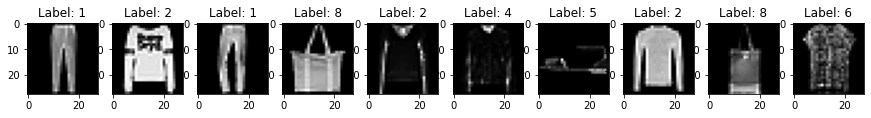

In [67]:
# visualize samples from the dataset
def visualize_samples(X, Y, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        # Randomly select an index
        idx = np.random.randint(X.shape[0])

        # Reshape and display the image
        image = X[idx].reshape(28, 28)  # Remove the extra dimension for channel
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {Y[idx]}")  # No need for np.argmax here

    plt.show()

visualize_samples(train_images, train_labels)


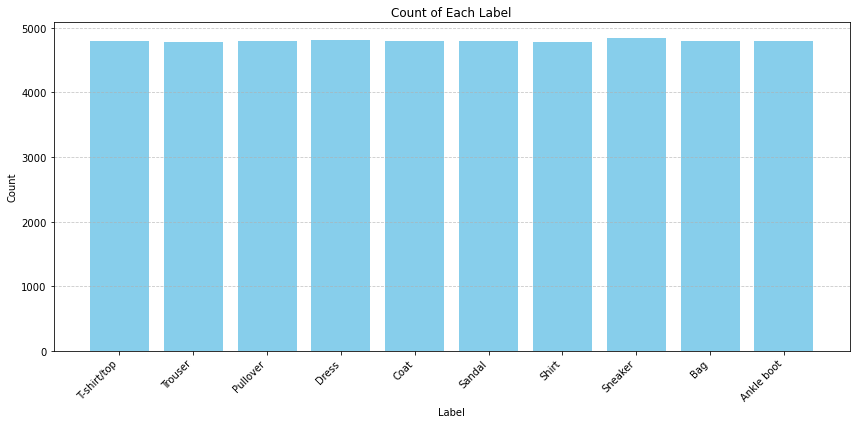

In [66]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_label_counts(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(12, 6))
    plt.bar(unique_labels, label_counts, color='skyblue')
    plt.title('Count of Each Label')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(unique_labels, labels=label_names, rotation=45, ha='right')  # Set label names and rotate for better visibility
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_label_counts(train_labels)

In [30]:
# Preprocessing function including quadratic intensity scaling

def preprocess_images(images):
    """
    Preprocesses a batch of images by applying quadratic intensity scaling.

    Parameters:
        images (numpy.ndarray): A batch of images to be preprocessed. Each image should be represented as a 2D numpy array.

    Returns:
        numpy.ndarray: An array containing the preprocessed images with quadratic intensity scaling applied.
            The shape of the output array is the same as the input array.

    Notes:
        - This function scales the intensity values of each pixel in the images quadratically.
        - Intensity scaling is applied by dividing each pixel value by 255.0 and then squaring the result.
        - The input images should be represented as 2D numpy arrays.
        - The output array contains preprocessed images with the same shape as the input array.
    """
    processed_images = []
    for image in images:
        # Apply quadratic intensity scaling
        scaled_image = np.square(image.astype(np.float32) / 255.0)
        processed_images.append(scaled_image)
    return np.array(processed_images)


In [31]:
# Preprocess train and test images
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [32]:
# Reshape images for CNN
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [33]:
# Split the data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Part 2

In [34]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels))

Epoch 1/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5763 - accuracy: 0.7914 - val_loss: 0.4262 - val_accuracy: 0.8439
Epoch 2/50
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3607 - accuracy: 0.8702 - val_loss: 0.3358 - val_accuracy: 0.8755
Epoch 3/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3030 - accuracy: 0.8895 - val_loss: 0.3219 - val_accuracy: 0.8824
Epoch 4/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2644 - accuracy: 0.9029 - val_loss: 0.3007 - val_accuracy: 0.8893
Epoch 5/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2384 - accuracy: 0.9131 - val_loss: 0.2700 - val_accuracy: 0.8987
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2129 - accuracy: 0.9209 - val_loss: 0.2885 - val_accuracy: 0.8972
Epoch 7/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1917 - accuracy: 0.9303 - val_loss: 0.2751 -

In [41]:
# Save the model with the highest validation accuracy
best_model_path = 'best_model.h5'
best_model_index = np.argmax(history.history['val_accuracy'])
best_model_accuracy = history.history['val_accuracy'][best_model_index]
model.save(best_model_path)

In [42]:
print(f"Model with highest validation accuracy ({best_model_accuracy:.4f}) saved as '{best_model_path}'")

Model with highest validation accuracy (0.9072) saved as 'best_model.h5'


In [43]:
# Load the best model for evaluation
best_model = tf.keras.models.load_model(best_model_path)

In [68]:
# Evaluate the model on test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8701 - accuracy: 0.8972

Test Accuracy: 0.8972


In [45]:
# Predictions
y_pred = np.argmax(best_model.predict(test_images), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [46]:
# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8972
Precision: 0.8980
Recall: 0.8972
F1 Score: 0.8971


# Part 3

In [48]:
# Importing packages
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [49]:
# Define the enhanced CNN model architecture
enhanced_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [50]:
# Compile the enhanced model
enhanced_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [51]:
# Define callbacks for ReduceLRonPlateau and EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
# Train the enhanced model
enhanced_history = enhanced_model.fit(train_images, train_labels, epochs=50, 
                                      validation_data=(val_images, val_labels),
                                      callbacks=[reduce_lr, early_stopping])

Epoch 1/50
1500/1500 [==============================] - 25s 16ms/step - loss: 0.6940 - accuracy: 0.7607 - val_loss: 0.3835 - val_accuracy: 0.8591 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 28s 19ms/step - loss: 0.4436 - accuracy: 0.8456 - val_loss: 0.3383 - val_accuracy: 0.8748 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3891 - accuracy: 0.8633 - val_loss: 0.3261 - val_accuracy: 0.8781 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3571 - accuracy: 0.8762 - val_loss: 0.2920 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3365 - accuracy: 0.8813 - val_loss: 0.2788 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 6/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3177 - accuracy: 0.8880 - val_loss: 0.2873 - val_accuracy: 0.8943 - lr: 0.0010
Epoch 7/50
1500/1500 [========================

In [70]:
# Evaluate the enhanced model on test set
enhanced_test_loss, enhanced_test_acc = enhanced_model.evaluate(test_images, test_labels)
print(f"\nEnhanced Model - Test Accuracy: {enhanced_test_acc:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2455 - accuracy: 0.9122

Enhanced Model - Test Accuracy: 0.9122


In [69]:
# Predictions
y_pred_enhanced = np.argmax(enhanced_model.predict(test_images), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [54]:
# Calculate evaluation metrics for enhanced model
accuracy_enhanced = accuracy_score(test_labels, y_pred_enhanced)
precision_enhanced = precision_score(test_labels, y_pred_enhanced, average='weighted')
recall_enhanced = recall_score(test_labels, y_pred_enhanced, average='weighted')
f1_enhanced = f1_score(test_labels, y_pred_enhanced, average='weighted')

print(f"Enhanced Model - Accuracy: {accuracy_enhanced:.4f}")
print(f"Enhanced Model - Precision: {precision_enhanced:.4f}")
print(f"Enhanced Model - Recall: {recall_enhanced:.4f}")
print(f"Enhanced Model - F1 Score: {f1_enhanced:.4f}")

Enhanced Model - Accuracy: 0.9122
Enhanced Model - Precision: 0.9125
Enhanced Model - Recall: 0.9122
Enhanced Model - F1 Score: 0.9119


# Comparison of model (part-2) and enhanced model (part-3)

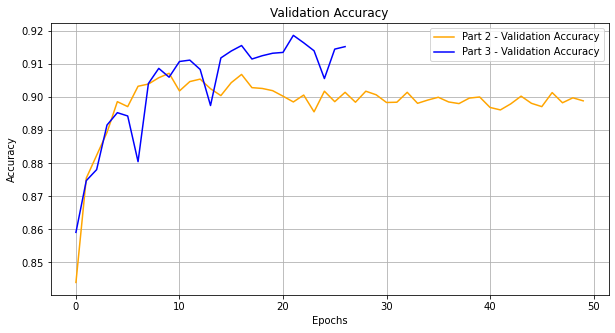

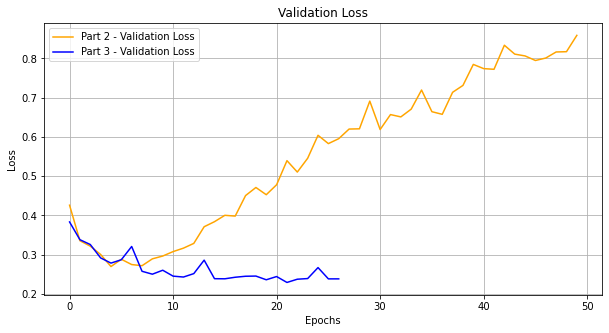

In [72]:
import matplotlib.pyplot as plt

# Plot training and validation accuracies
plt.figure(figsize=(10,5))
# plt.plot(history.history['accuracy'], label='Part 2 - Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Part 2 - Validation Accuracy', color='orange')
# plt.plot(enhanced_history.history['accuracy'], label='Part 3 - Training Accuracy', color='orange')
plt.plot(enhanced_history.history['val_accuracy'], label='Part 3 - Validation Accuracy', color='blue')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation losses
plt.figure(figsize=(10,5))
# plt.plot(history.history['loss'], label='Part 2 - Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Part 2 - Validation Loss', color='orange')
# plt.plot(enhanced_history.history['loss'], label='Part 3 - Training Loss', color='orange')
plt.plot(enhanced_history.history['val_loss'], label='Part 3 - Validation Loss', color='blue')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
